# Has rain gotten more frequent in Seattle?
## Madhavi Ghanta
https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017 
______________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import binom
%matplotlib inline 

In [3]:
rain = pd.read_csv("C:/Users/mghan/Documents/MSDS/Portfolio/seattleWeather_1948-2017.csv")

In [4]:
rain.describe()
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1/1/1948,0.47,51,42,True
1,1/2/1948,0.59,45,36,True
2,1/3/1948,0.42,45,35,True
3,1/4/1948,0.31,45,34,True
4,1/5/1948,0.17,45,32,True


In [8]:
#Bad Values within the data set
rain[pd.isnull(rain).any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,6/2/1998,NaN,72,52,NaN
18416,6/3/1998,NaN,66,51,NaN
21067,9/5/2005,NaN,70,52,NaN


In [9]:
#Cleaning data set
rain.dropna(axis=1, how='all', inplace=True)

# Hypothesis:
Rain has been steadily increasing in Seattle.
Null Hypothesis: Rain has has not increased or changed over time 

## Describe what the 5 variables mean in the dataset (Chapter 1).
DATE: the date of the observation

PRCP: the amount of precipitation, in inches

TMAX: the maximum temperature for that day, in degrees Fahrenheit

TMIN: the minimum temperature for that day, in degrees Fahrenheit

RAIN: TRUE if rain was observed on that day, FALSE if it was not

___
Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). 

C:\Users\mghan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PRCP', ylabel='Density'>

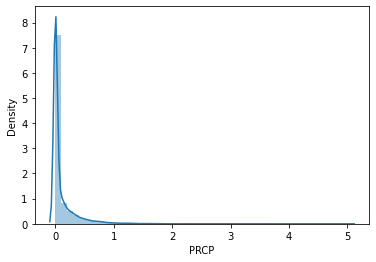

In [10]:
#Skipping date on histogram
sns.distplot(rain['PRCP'].dropna())

C:\Users\mghan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TMAX', ylabel='Density'>

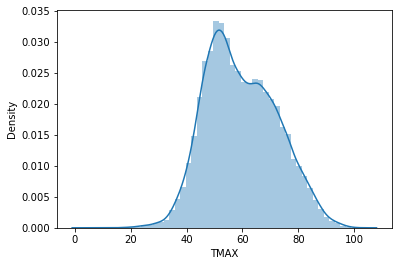

In [11]:
sns.distplot(rain['TMAX'].dropna())

C:\Users\mghan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TMIN', ylabel='Density'>

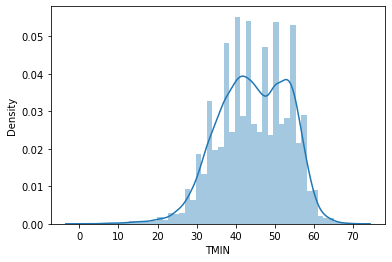

In [12]:
sns.distplot(rain['TMIN'].dropna())

<AxesSubplot:>

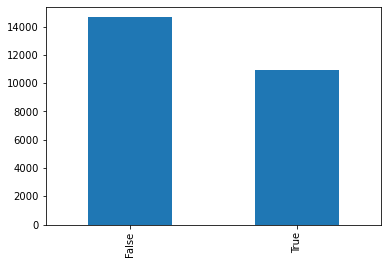

In [13]:
rain['RAIN'].value_counts().plot(kind='bar', label='Rain')

Include the other descriptive characteristics about the variables: 
* Mean
* Mode 
* Spread
* Tails

In [14]:
rain['TMIN'].mean(), rain['TMIN'].median(), rain['TMIN'].mode(), rain['TMIN'].std() 

(44.51422644906266,
 45.0,
 0    42
 Name: TMIN, dtype: int64,
 8.892835742411922)

In [15]:
rain['DATE'].max(), rain['DATE'].min()

('9/9/2017', '1/1/1948')

In [16]:
rain['DATE']= pd.to_datetime(rain['DATE'])

In [17]:
rain['YEAR']= rain['DATE'].dt.year

In [18]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR
0,1948-01-01,0.47,51,42,True,1948
1,1948-01-02,0.59,45,36,True,1948
2,1948-01-03,0.42,45,35,True,1948
3,1948-01-04,0.31,45,34,True,1948
4,1948-01-05,0.17,45,32,True,1948


In [19]:
first_half = rain[rain["DATE"]>='1982-12-22 00:00:00']
second_half = rain[rain["DATE"]<='1982-12-23 00:00:00']

<BarContainer object of 183 artists>

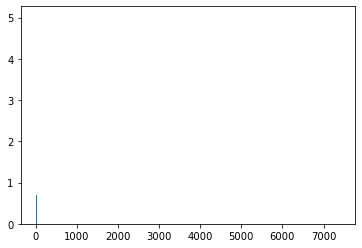

In [22]:
plt.bar(list(pmf_first.values()),list(pmf_first.keys()))

<BarContainer object of 175 artists>

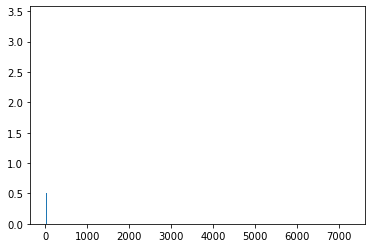

In [25]:
plt.bar(list(pmf_second.values()), list(pmf_second.keys()))

In [113]:
pmf

{0.0: 7246,
 0.01: 462,
 0.02: 353,
 0.03: 258,
 0.04: 198,
 0.05: 212,
 0.06: 209,
 0.07: 170,
 0.08: 174,
 0.09: 130,
 0.1: 129,
 0.11: 142,
 0.12: 146,
 0.13: 130,
 0.14: 112,
 0.15: 108,
 0.16: 97,
 0.17: 96,
 0.18: 70,
 0.19: 63,
 0.2: 101,
 0.21: 73,
 0.22: 62,
 0.23: 77,
 0.24: 70,
 0.25: 62,
 0.26: 59,
 0.27: 51,
 0.28: 68,
 0.29: 64,
 0.3: 67,
 0.31: 54,
 0.32: 38,
 0.33: 51,
 0.34: 47,
 0.35: 53,
 0.36: 49,
 0.37: 41,
 0.38: 44,
 0.39: 42,
 0.4: 29,
 0.41: 28,
 0.42: 32,
 0.43: 26,
 0.44: 33,
 0.45: 46,
 0.46: 27,
 0.47: 30,
 0.48: 22,
 0.49: 31,
 0.5: 26,
 0.51: 24,
 0.52: 17,
 0.53: 25,
 0.54: 24,
 0.55: 19,
 0.56: 35,
 0.57: 15,
 0.58: 21,
 0.59: 13,
 0.6: 24,
 0.61: 16,
 0.62: 16,
 0.63: 13,
 0.64: 13,
 0.65: 9,
 0.66: 17,
 0.67: 18,
 0.68: 8,
 0.69: 9,
 0.7: 17,
 0.71: 15,
 0.72: 9,
 0.73: 13,
 0.74: 20,
 0.75: 7,
 0.76: 11,
 0.77: 9,
 0.78: 9,
 0.79: 13,
 0.8: 13,
 0.81: 8,
 0.82: 4,
 0.83: 13,
 0.84: 10,
 0.85: 6,
 0.86: 5,
 0.87: 8,
 0.88: 12,
 0.89: 3,
 0.9: 2,
 0.91

In [27]:
#Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).



Text(0.5, 1.0, 'Rain Corr')

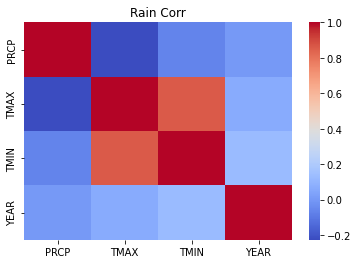

In [29]:
sns.heatmap(rain.corr(), cmap='coolwarm')
plt.title('Rain Corr')

In [30]:
rain_per_year = rain[(rain['RAIN']==True)].groupby('YEAR').count()

In [31]:
year_rain_count=rain[rain['RAIN']==True].groupby('YEAR').count()

In [32]:
rain_per_year['RAIN']=year_rain_count['RAIN']

In [33]:
rain_per_year['TMIN MEAN']=rain.groupby('YEAR')['TMIN'].mean()
rain_per_year['TMAX MEAN']=rain.groupby('YEAR')['TMAX'].mean()
rain_per_year['PRCP MEAN']=rain.groupby('YEAR')['PRCP'].mean()

In [34]:
rain_per_year.reset_index(inplace=True)

In [35]:
rain_per_year = rain_per_year[['YEAR', 'RAIN', 'TMIN MEAN', 'TMAX MEAN', 'PRCP MEAN']]

In [36]:
rain_per_year.head()

,YEAR,RAIN,TMIN MEAN,TMAX MEAN,PRCP MEAN
0,1948,177,41.196721,57.013661,0.125109
1,1949,139,41.391781,59.147945,0.088932
2,1950,194,41.000000,57.035616,0.151068
3,1951,150,41.052055,58.545205,0.110411
4,1952,139,41.467213,58.743169,0.064973


In [37]:
rain_per_year.columns

Index(['YEAR', 'RAIN', 'TMIN MEAN', 'TMAX MEAN', 'PRCP MEAN'], dtype='object')

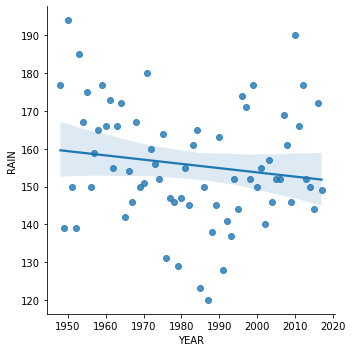

In [38]:
sns.lmplot(x='YEAR', y='RAIN', data=rain_per_year)

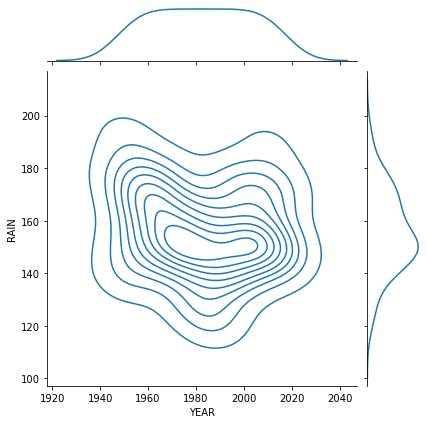

In [39]:
sns.jointplot(x='YEAR', y='RAIN', data=rain_per_year, kind='kde')

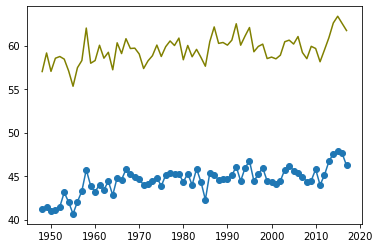

In [40]:
plt.plot('YEAR', 'TMIN MEAN', data=rain_per_year, marker='o')
plt.plot('YEAR', 'TMAX MEAN', data=rain_per_year, marker='', color='olive')

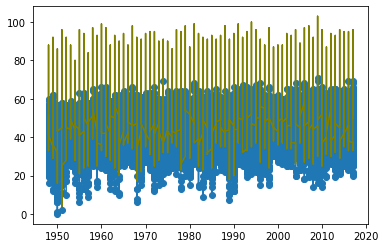

In [41]:
plt.plot('YEAR', 'TMIN', data=rain, marker='o')
plt.plot('YEAR', 'TMAX', data=rain, marker='', color='olive')

C:\Users\mghan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


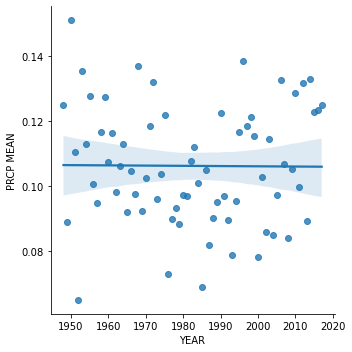

In [42]:
sns.lmplot('YEAR', 'PRCP MEAN', data=rain_per_year)

C:\Users\mghan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


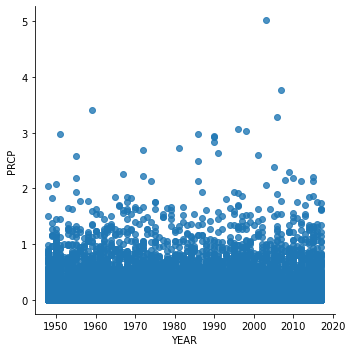

In [43]:
sns.lmplot('YEAR', 'PRCP', data=rain)

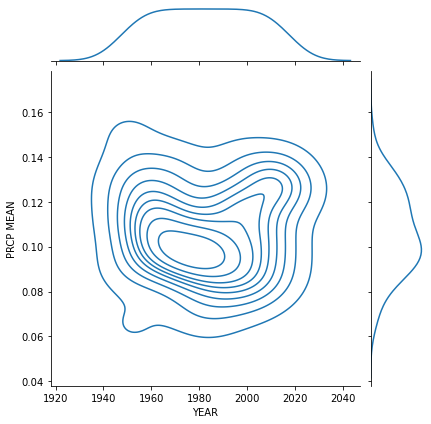

In [44]:
sns.jointplot(x='YEAR', y='PRCP MEAN', data=rain_per_year, kind='kde')

In [50]:
super_column = rain_per_year[['YEAR', 'TMIN MEAN', 'TMAX MEAN']]

In [51]:
super_column['Max']='Max'

C:\Users\mghan\AppData\Local\Temp\ipykernel_1592\3469924724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super_column['Max']='Max'


In [52]:
super_column['Min']='Min'

In [53]:
max = super_column[['YEAR', 'TMAX MEAN', 'Max']]
min = super_column[['YEAR', 'TMIN MEAN', 'Min']]

In [54]:
max['temp']=max['TMAX MEAN']
max['type']=max['Max']
min['temp']=min['TMIN MEAN']
min['type']=min['Min']

C:\Users\mghan\AppData\Local\Temp\ipykernel_1592\3706309177.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max['temp']=max['TMAX MEAN']
C:\Users\mghan\AppData\Local\Temp\ipykernel_1592\3706309177.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  min['temp']=min['TMIN MEAN']


In [55]:
max = max[['YEAR', 'temp', 'type']]
min = min[['YEAR', 'temp', 'type']]

In [56]:
combined = max.append(min)

C:\Users\mghan\AppData\Local\Temp\ipykernel_1592\299298275.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined = max.append(min)


<AxesSubplot:>

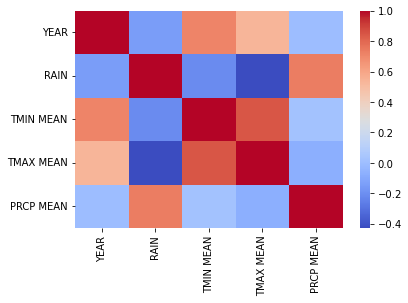

In [57]:
sns.heatmap(rain_per_year.corr(), cmap='coolwarm')

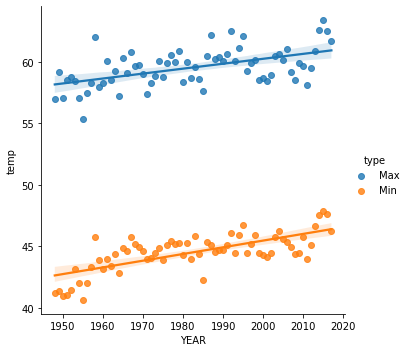

In [58]:
sns.lmplot(x='YEAR', y='temp', hue='type', data=combined)

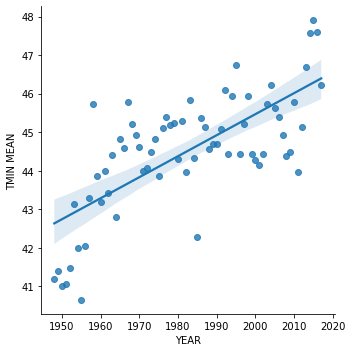

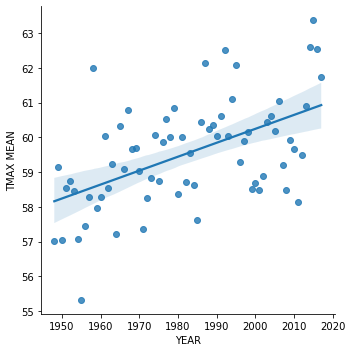

In [59]:
sns.lmplot(x='YEAR', y='TMIN MEAN', data=rain_per_year)
sns.lmplot(x='YEAR', y='TMAX MEAN', data=rain_per_year)

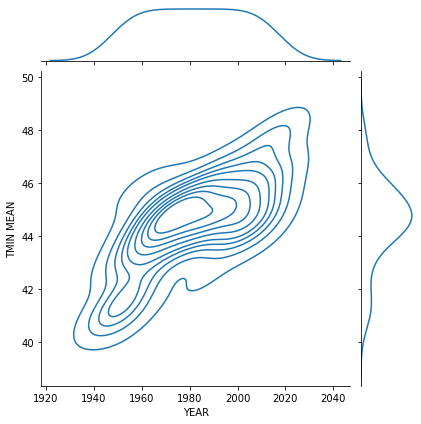

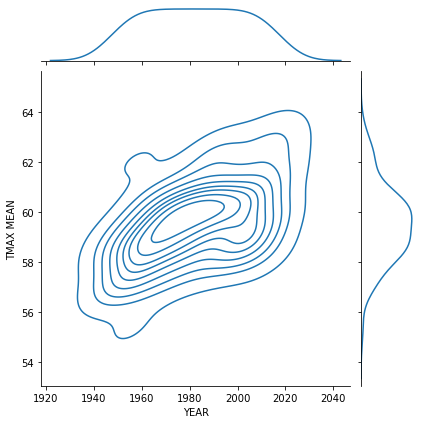

In [60]:
sns.jointplot(x='YEAR', y='TMIN MEAN', data=rain_per_year, kind='kde')
sns.jointplot(x='YEAR', y='TMAX MEAN', data=rain_per_year, kind='kde')

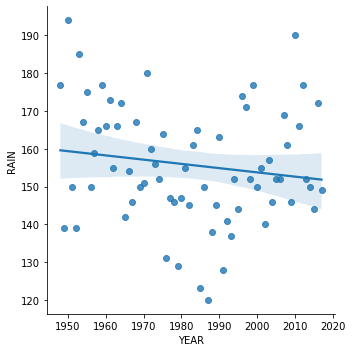

In [61]:
sns.lmplot(x='YEAR', y='RAIN', data=rain_per_year)

In [62]:
import statsmodels.formula.api as sm

In [63]:

result = sm.ols(formula='RAIN ~ YEAR',data=rain_per_year).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   RAIN   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.520
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.222
Time:                        18:34:13   Log-Likelihood:                -289.74
No. Observations:                  70   AIC:                             583.5
Df Residuals:                      68   BIC:                             588.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.4702    180.659      2.095      0.0

In [64]:

result = sm.ols(formula='RAIN ~ YEAR',data=rain_per_year).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   RAIN   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.520
Date:                Fri, 31 May 2024   Prob (F-statistic):              0.222
Time:                        18:34:17   Log-Likelihood:                -289.74
No. Observations:                  70   AIC:                             583.5
Df Residuals:                      68   BIC:                             588.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    378.4702    180.659      2.095      0.0

In [65]:
result.pvalues

Intercept    0.039904
YEAR         0.221791
dtype: float64